In [60]:
import pandas as pd
mall_customers = pd.read_csv('Mall_Customers.csv')
mall_customers_df = pd.DataFrame(mall_customers)
mall_customers_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [61]:
#이상치 처리
def iqr_remove(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df
mall_customers_df = iqr_remove(mall_customers_df,'Annual Income (k$)')

{'whiskers': [<matplotlib.lines.Line2D at 0x21a30b43160>,
 'caps': [<matplotlib.lines.Line2D at 0x21a30b43520>,
 'boxes': [<matplotlib.lines.Line2D at 0x21a30b35e80>],
 'medians': [<matplotlib.lines.Line2D at 0x21a30b43a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x21a30b43d00>],
 'means': []}

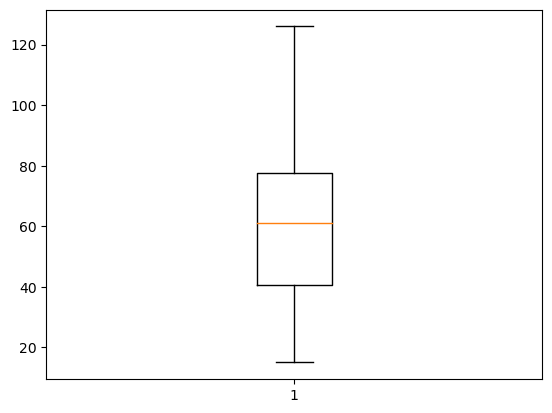

In [62]:
import matplotlib.pyplot as plt
plt.boxplot(mall_customers_df['Annual Income (k$)'])

In [63]:
#군집 분석에 영향 없는 특징들은 삭제
mall_customers_df = mall_customers_df.drop(['CustomerID','Gender'],axis=1)

# 데이터 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(mall_customers_df)

c:\Users\USER\anaconda3\envs\ai_edu_38\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\USER\anaconda3\envs\ai_edu_38\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\USER\anaconda3\envs\ai_edu_38\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\USER\anaconda3\envs\ai_edu_38\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known t

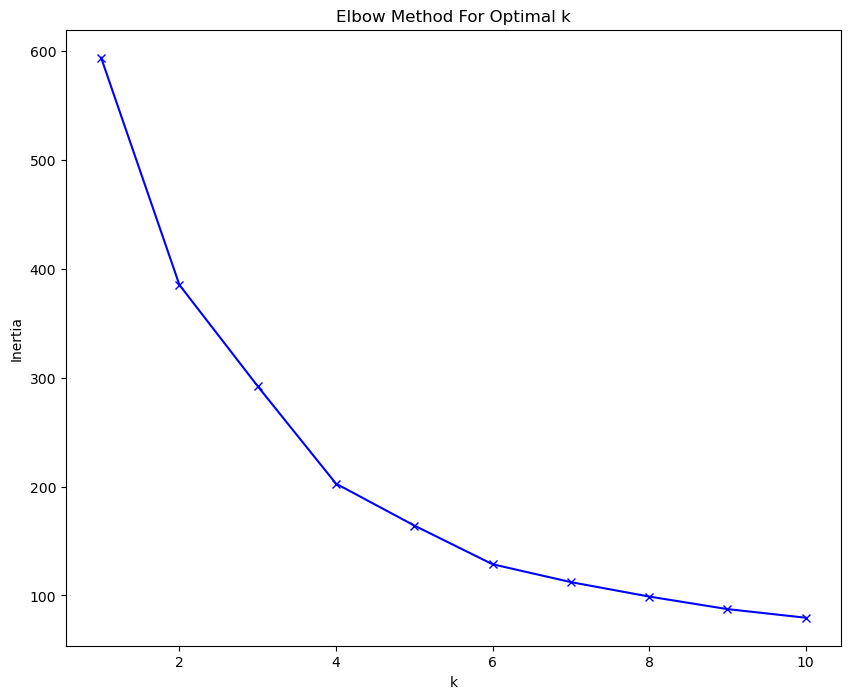

In [64]:
#K-Means : 미리 k값을 지정해야함(그래야 엘보우 그래프 그리기 가능)
# 최적의 k 찾기 (엘보우 방법)
from sklearn.cluster import KMeans
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# 엘보우 그래프 그리기
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [56]:
# 최적의 클러스터 수를 5로 판단하여 kmeans 학습
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

c:\Users\USER\anaconda3\envs\ai_edu_38\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\USER\anaconda3\envs\ai_edu_38\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [57]:
#군집화된 결과 데이터프레임에 추가
mall_customers_df['Cluster']=clusters

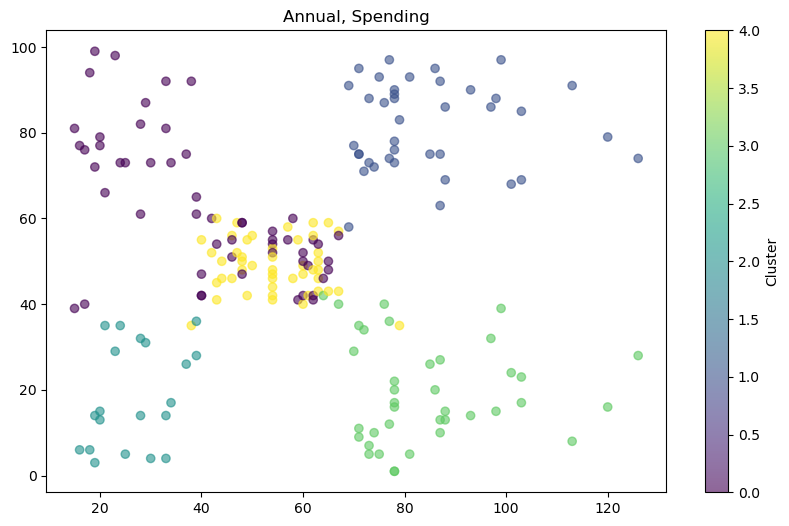

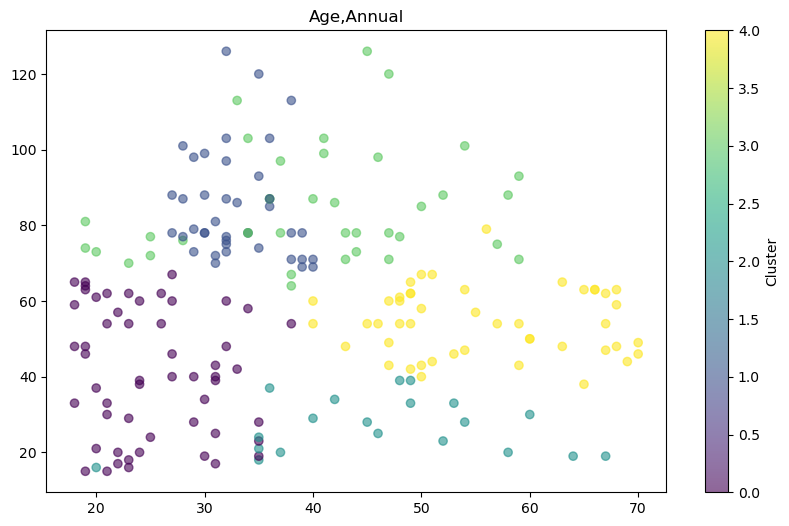

In [58]:
# 클러스터별 데이터 시각화
plt.figure(figsize=(10, 6))
plt.scatter(mall_customers_df['Annual Income (k$)'], mall_customers_df['Spending Score (1-100)'], c=clusters, cmap='viridis', alpha=0.6)
plt.title('Annual, Spending')
plt.colorbar(label='Cluster')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(mall_customers_df['Age'], mall_customers_df['Annual Income (k$)'], c=clusters, cmap='viridis', alpha=0.6)
plt.title('Age,Annual')
plt.colorbar(label='Cluster')
plt.show()


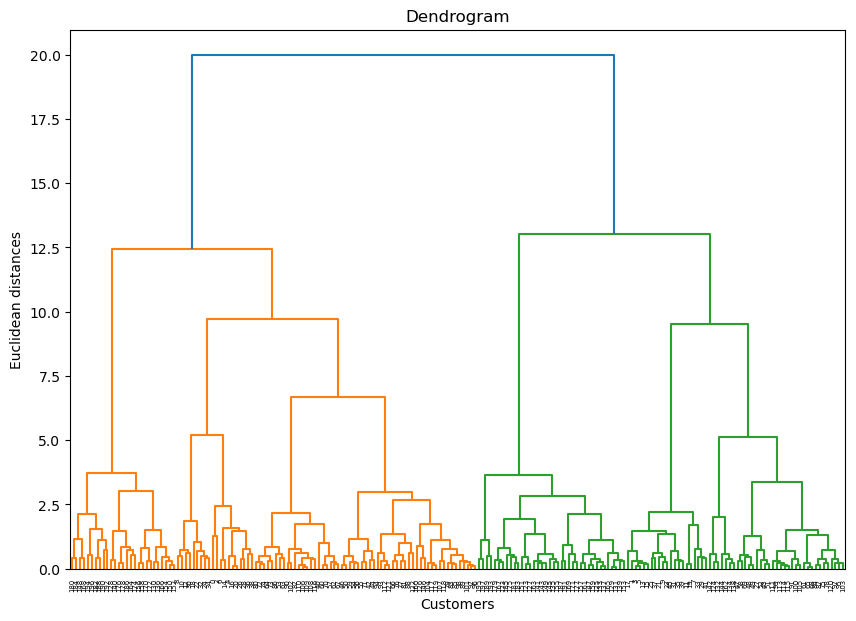

In [ ]:
#계층적 군집화 : 덴드로그램으로 확인하고 k 지정해도 된다.
#덴드로그램 생성
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

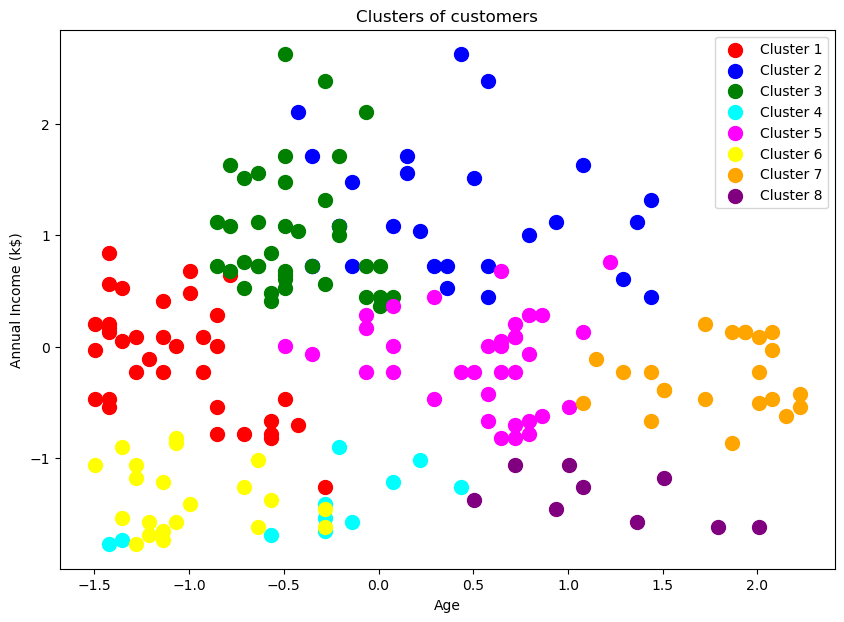

In [ ]:
# 계층적 군집화 모델 생성
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=8, metric='euclidean', linkage='ward') #metric(데이터 포인트들 간의 거리), ward(군집들 간의 거리)

# 모델 학습 및 예측
y_hc = hc.fit_predict(data_scaled)

# 결과 시각화
plt.figure(figsize=(10, 7))
#열=0(Age)=x축, 열=1(Annual Income)=y축으로 총 8개의 그룹으로 그래프 표현
plt.scatter(data_scaled[y_hc == 0, 0], data_scaled[y_hc == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(data_scaled[y_hc == 1, 0], data_scaled[y_hc == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(data_scaled[y_hc == 2, 0], data_scaled[y_hc == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(data_scaled[y_hc == 3, 0], data_scaled[y_hc == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(data_scaled[y_hc == 4, 0], data_scaled[y_hc == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.scatter(data_scaled[y_hc == 5, 0], data_scaled[y_hc == 5, 1], s=100, c='yellow', label='Cluster 6')
plt.scatter(data_scaled[y_hc == 6, 0], data_scaled[y_hc == 6, 1], s=100, c='orange', label='Cluster 7')
plt.scatter(data_scaled[y_hc == 7, 0], data_scaled[y_hc == 7, 1], s=100, c='purple', label='Cluster 8')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.show()

In [93]:
from sklearn.metrics import silhouette_score #-1(에측 잘 못함) ~ 1(예측 잘함)

# 실루엣 점수 계산
silhouette_avg = silhouette_score(data_scaled, y_hc)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.4280478300109633
